In [42]:
import ArxSR
import matplotlib.pyplot as plt
from astropy.io import fits  # For handling FITS files
import reduct
import os
import sys
import shutil
from scipy.signal import find_peaks
import numpy as np 
import scipy  
from scipy import signal 
from scipy.optimize import curve_fit, least_squares, leastsq, fsolve  
from scipy.interpolate import interp1d  
from scipy.ndimage import label 
import math  
import statistics  

# Data handling and analysis
import pandas as pd  # For data manipulation and analysis
from collections import Counter  # For counting hashable objects
from scipy import stats  # For statistical functions
from scipy.signal import chirp, find_peaks, peak_widths
# Image processing and computer vision
import cv2  # For computer vision tasks
from PIL import Image  # For image manipulation
from skimage import io, color, measure  # For image I/O and processing
from skimage.transform import hough_circle, hough_circle_peaks  # For Hough circle transforms
from skimage.feature import canny  # For edge detection
from skimage.draw import circle_perimeter  # For drawing circle perimeters
from skimage.util import img_as_ubyte  # For image type conversion

# Plotting and visualization
import matplotlib.pyplot as plt  # For plotting and visualization

# Machine learning
from sklearn.linear_model import RANSACRegressor, LinearRegression  # For regression analysis
from sklearn.pipeline import make_pipeline  # For making pipelines
from sklearn.preprocessing import PolynomialFeatures  # For generating polynomial features
from sklearn.metrics import mean_squared_error  # For calculating mean squared error

# Astronomy specific packages
import astropy  # For astronomy specific tasks
from astropy.io import fits  # For handling FITS files
from astropy.time import Time  # For handling time objects
from astropy.coordinates import SkyCoord  # For celestial coordinate system conversions
import astropy.units as u  # For unit conversions
# our func
import reduct
# Polynomial operations
from numpy.polynomial.polynomial import polyder  # For polynomial differentiation
from numpy.polynomial import Polynomial  # For polynomial operations
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter
from numpy.polynomial.polynomial import Polynomial



In [3]:
path = '../../Dropbox/QC2Python_spectrums/NGC3516_TO_ALIGN/crop-rot/NGC3516_24-25.03.1990_10m_LI-3-17-crop.fits'

In [4]:
ls

20250503_tester.ipynb  Pro.AP22784884.pyproj  qrc_resources.py
AFI.png                Pro.AP22784884.sln     reduct.py
API.png                __pycache__/           resources/
ArxSR.py               dark.css               resources.qrc
CvEditor.py            light.css              temp.png
GUIcomp.py             model.char/            ttt.png
HeaderEditWindow.py    model.cropper/
Pro.AP22784884.py      model.usage/


NGC3516_24-25.03.1990_10m_LI-3-17-crops


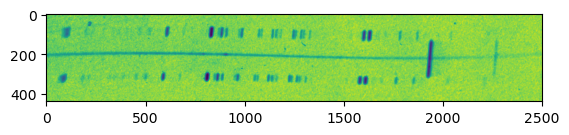

In [5]:
arx_data = ArxSR.ArxData(path)

plt.imshow(arx_data.get_data())

spec_editor = ArxSR.ArxSpectEditor(arx_data)
result = spec_editor.SDistorsionCorr(top=180, down=240, order_mse=3)


# ArxSR.ArxData.get_data(path)

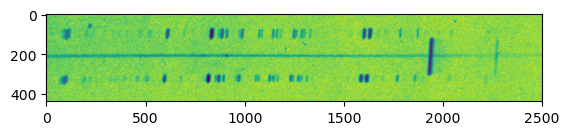

In [6]:
plt.imshow(result)

In [ ]:
CLIB

In [23]:
path_cal = '../../Dropbox/QC2Python_spectrums/caliobscperts/20241104_for_methods/19811002/cropped_rotated/'

In [35]:
fits_cal_1  = fits.open(path_cal+ 'Calibrovka_02-03.10.1981_15s_Cal-crop.fits')
fits_cal_3  = fits.open(path_cal+ 'Calibrovka_02-03.10.1981_1m_Cal-crop.fits')
fits_cal_4  = fits.open(path_cal+ 'Calibrovka_02-03.10.1981_2.5m_Cal-crop.fits')
fits_cal_2  = fits.open(path_cal+ 'Calibrovka_02-03.10.1981_30s_Cal-crop.fits')
fits_cal_5  = fits.open(path_cal+ 'Calibrovka_02-03.10.1981_5m_Cal-crop.fits')
data_cal_1 = fits_cal_1[0].data
data_cal_2 = fits_cal_2[0].data
data_cal_3 = fits_cal_3[0].data
data_cal_4 = fits_cal_4[0].data
data_cal_5 = fits_cal_5[0].data
mean_cal_1 = reduct.calib_preob(data_cal_1)
mean_cal_2 = reduct.calib_preob(data_cal_2)
mean_cal_3 = reduct.calib_preob(data_cal_3)
mean_cal_4 = reduct.calib_preob(data_cal_4)
mean_cal_5 = reduct.calib_preob(data_cal_5)

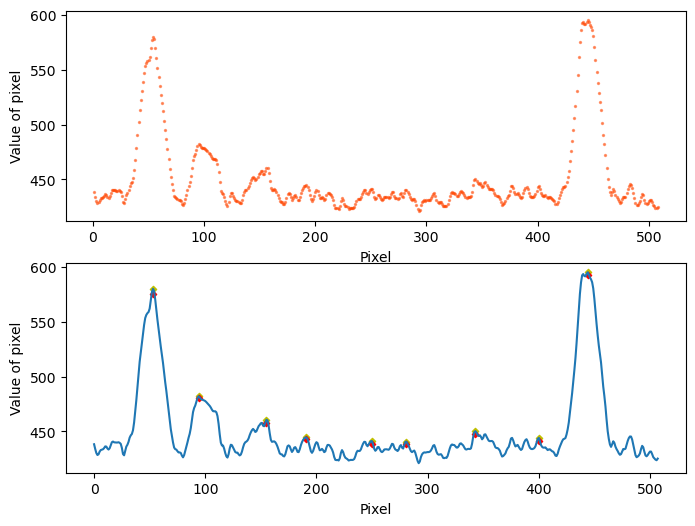

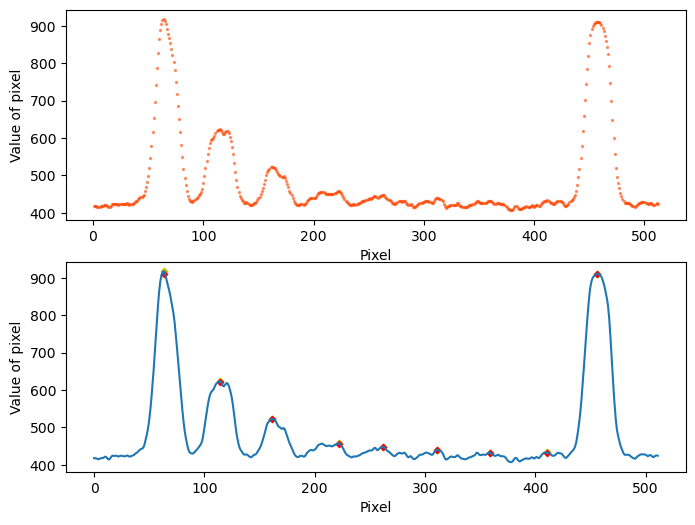

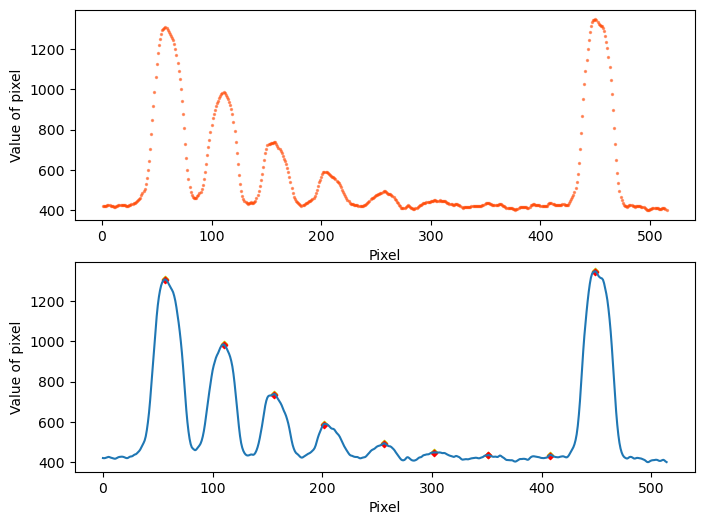

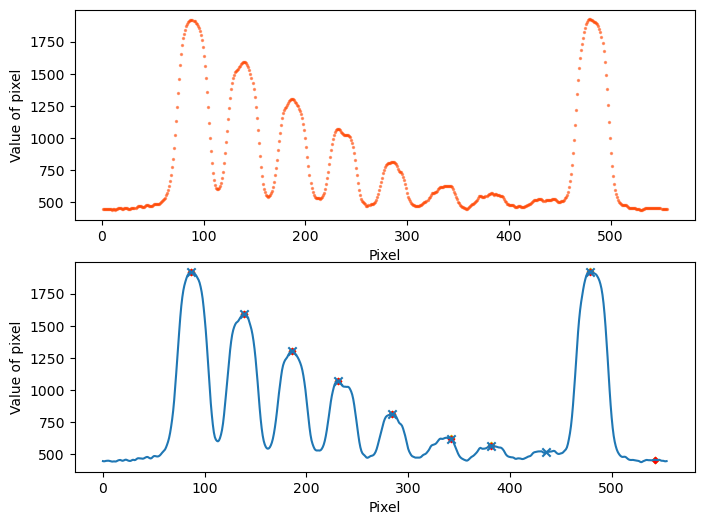

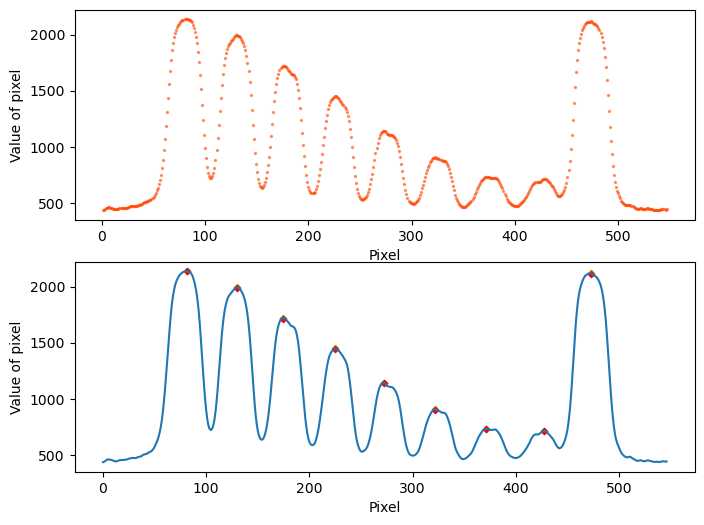

In [44]:
peaks_ind_1,peaks_mean_1 = reduct.graf(mean_cal_1,23)#

peaks_ind_2,peaks_mean_2 = reduct.graf(mean_cal_2,21)#

peaks_ind_3,peaks_mean_3 = reduct.graf(mean_cal_3,15)#

peaks_ind_4_,peaks_mean_4_ =reduct.graf(mean_cal_4,12)#[-1]
peaks_ind_4 = np.concatenate([peaks_ind_4_[:7],
                              [435],
                              [peaks_ind_4_[-2]]]) 
peaks_mean_4  = np.concatenate([peaks_mean_4_[:7],
                                [mean_cal_4[435]],
                                [peaks_mean_4_[-2]]])
# plt.plot(mean_cal_4)
plt.scatter(peaks_ind_4,peaks_mean_4, marker='x')

peaks_ind_5,peaks_mean_5 = reduct.graf(mean_cal_5,20)#

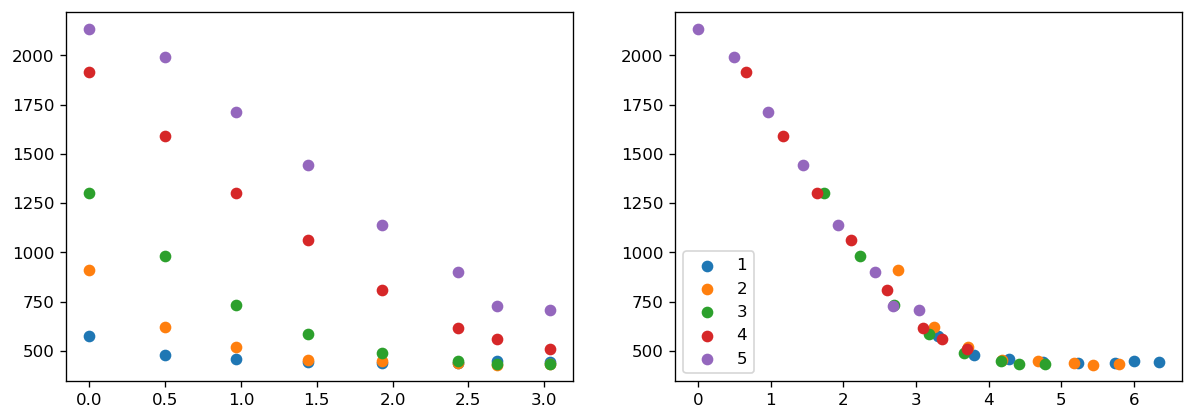

In [51]:
mag_TRP = [0.0, 0.20, 0.52, 0.87, 0.99, 1.72]
mag_before_1972 = [0,0.61,1.1,1.47,1.84,2.25,2.66,3.04,0]
mag_after_1972 = [0,0.5,0.97,1.44,1.93,2.43,2.69,3.04,0]
delta_m1 = 2.5*np.log(300/80)
delta_m2 = 2.5*np.log(300/100)
delta_m3 = 2.5*np.log(300/150)
delta_m4 = 2.5*np.log(300/230)
delta_m5 = 2.5*np.log(300/300)

fig = plt.figure(figsize=(12,4),dpi=120)
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(mag_after_1972[:-1],peaks_mean_1[:-1] , label=1)
ax1.scatter(mag_after_1972[:-1],peaks_mean_2[:-1] , label=2)
ax1.scatter(mag_after_1972[:-1],peaks_mean_3[:-1] , label=3)
ax1.scatter(mag_after_1972[:-1],peaks_mean_4[:-1] , label=4)
ax1.scatter(mag_after_1972[:-1],peaks_mean_5[:-1] , label=5)

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(mag_after_1972[:-1]+delta_m1,peaks_mean_1[:-1], label=1)
ax2.scatter(mag_after_1972[:-1]+delta_m2,peaks_mean_2[:-1], label=2)
ax2.scatter(mag_after_1972[:-1]+delta_m3,peaks_mean_3[:-1], label=3)
ax2.scatter(mag_after_1972[:-1]+delta_m4,peaks_mean_4[:-1], label=4)
ax2.scatter(mag_after_1972[:-1]+delta_m5,peaks_mean_5[:-1], label=5)

plt.legend(loc=3)

Best degree: 7, MSE: 2052.320509679435


/Users/adelumirbaeva/ArXSP/Pro.AP22784884/reduct.py:443: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)


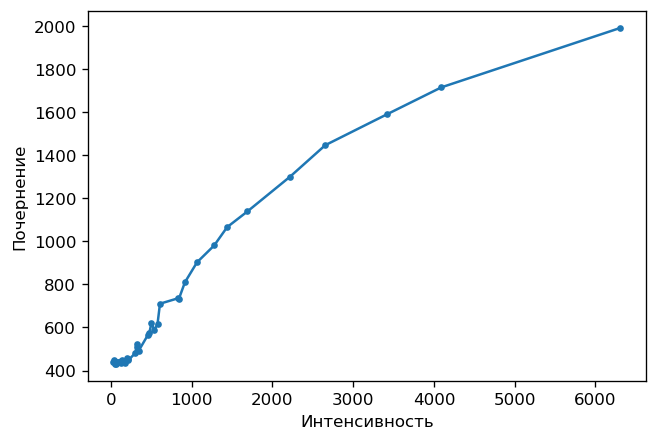

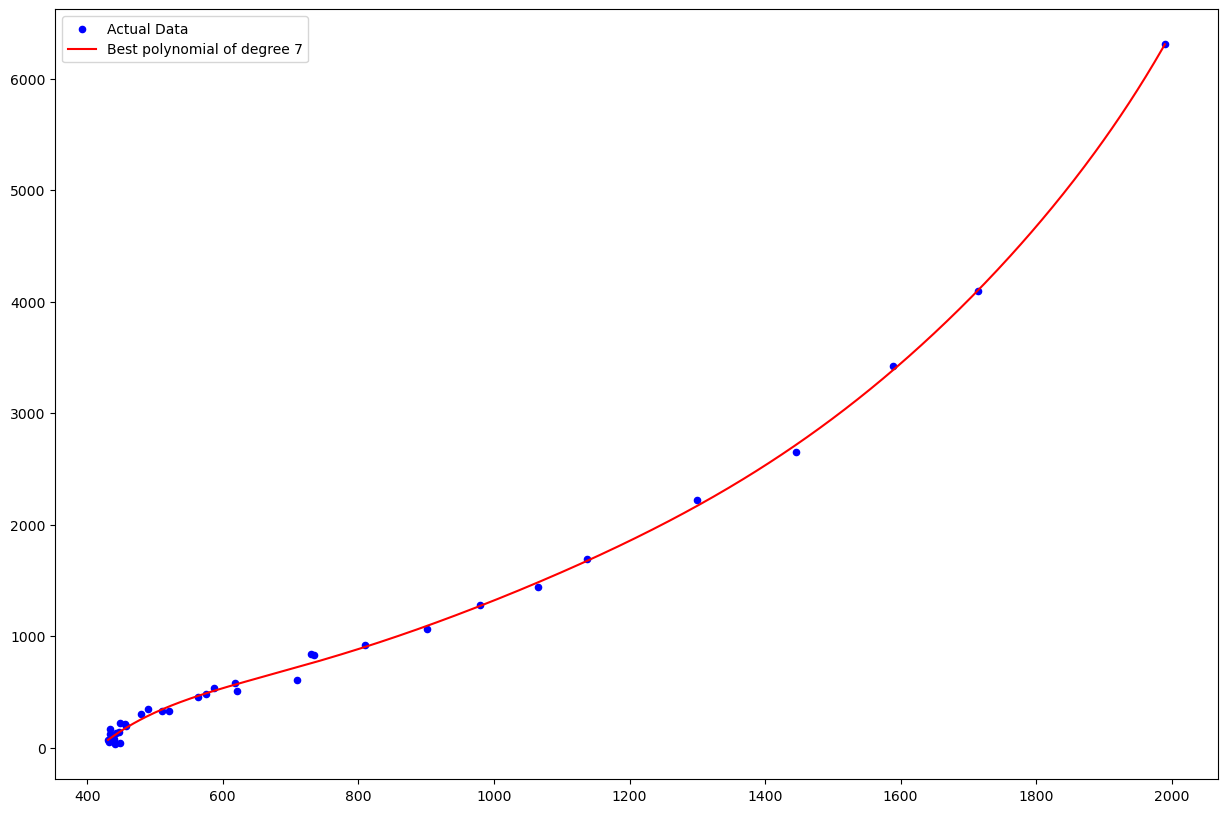

/opt/anaconda3/lib/python3.12/site-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


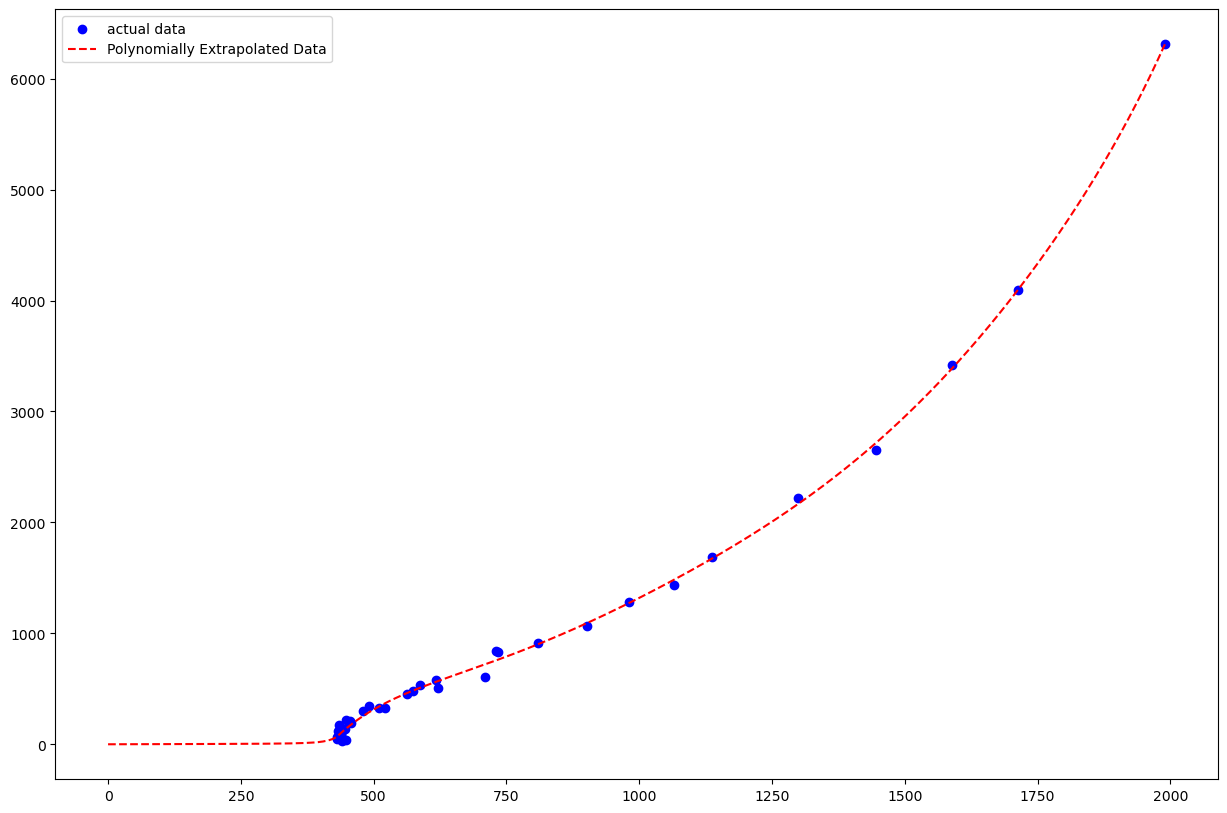

In [53]:
array = [peaks_mean_1[:-1] ,
         peaks_mean_2[:-1] ,
         peaks_mean_3[:-1] ,
         peaks_mean_4[:-1] ,
         peaks_mean_5[:-1]]
y_array = np.concatenate(array)
x_array = np.concatenate([mag_after_1972[:-1]+delta_m1,
                          mag_after_1972[:-1]+delta_m2,
                          mag_after_1972[:-1]+delta_m3,
                          mag_after_1972[:-1]+delta_m4,
                          mag_after_1972[:-1]+delta_m5])



intensity, dark = reduct.mean_deviation(x_array,y_array)
best_poly,polynomial_extrapolate,root = reduct.poly_mse_new(dark,intensity)

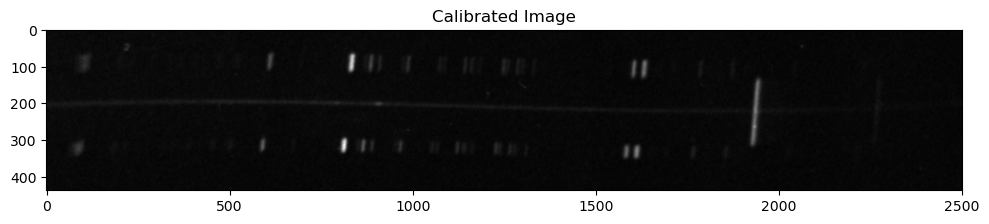

In [55]:

# best_poly и polynomial_extrapolate — это функции, которые ты сам определяешь

result = spec_editor.OptDen2Int(
    root=root,
    best_poly=best_poly,
    polynomial_extrapolate=polynomial_extrapolate
)

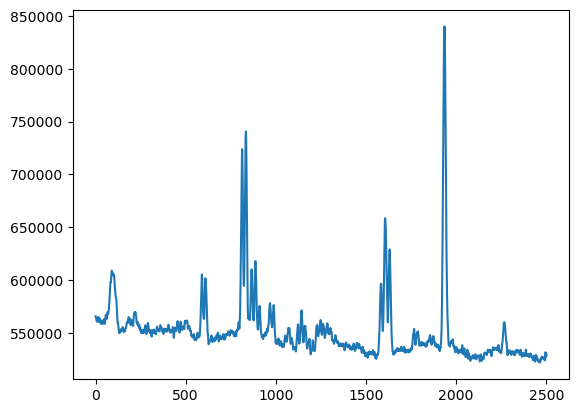

In [63]:
plt.plot(result.sum(axis=0))
